<a href="https://colab.research.google.com/github/Aman151295/Clustering_Using_KMeans-/blob/main/Airline_Problem_statement%20using%20KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K Means Clustering**

In [63]:
import pandas as pd
import numpy as np
import scipy 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [39]:
#Importing the dataset

Airlines =  pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')
display(Airlines)


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [40]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [52]:
# Normalising the data

Scaler = StandardScaler()

Airlines = Airlines.drop('ID#', axis=1)
Airlines_Scaled_Data = Scaler.fit_transform(Airlines.iloc[:,1:])


display(Airlines_Scaled_Data)

array([[-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.39545434, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.37995704, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.41192021, -0.7669193 ],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -0.36216787,
        -1.31560393,  1.30391816],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.09850333,
        -1.31608822, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
        -1.31754109, -0.7669193 ]])

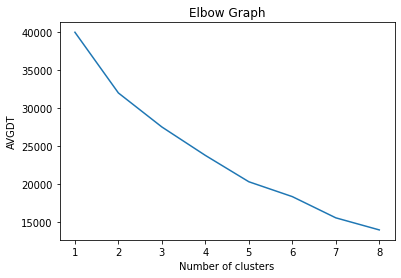

In [53]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 


AVGDT = []

for i in range (1,9):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(Airlines_Scaled_Data)
  AVGDT.append(kmeans.inertia_)


plt.plot(range(1,9), AVGDT)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('AVGDT')
plt.show()

In [54]:
# Build Cluster algorithm using K=5

Cluster_5 = KMeans(5, random_state = 0)
Cluster_5.fit(Airlines_Scaled_Data)



KMeans(n_clusters=5, random_state=0)

In [55]:
Cluster_5.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [58]:
# adding a cluster column in Original DataFrame

Airlines['Cluster no'] = Cluster_5.labels_


# Check the no of records associated to each cluster based on Similarity

Airlines['Cluster no'].value_counts()

1    2543
0    1239
3     159
2      43
4      15
Name: Cluster no, dtype: int64

In [62]:
# Group data by Clusters (K=5)

Airlines.groupby('Cluster no').agg(['mean']).reset_index()

,Cluster no,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,113109.586764,161.447942,3.748991,1.000000,1.001614,39873.142050,18.946731,327.729621,0.990315,4882.617433,0.656981
1,1,48322.784506,100.468344,1.236728,1.000000,1.000393,4780.663783,6.876917,206.081007,0.635863,3711.676366,0.202517
2,2,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
3,3,165229.408805,745.955975,2.169811,1.000000,1.000000,31205.081761,26.779874,5515.654088,15.911950,4665.981132,0.798742
4,4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
